In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
import math
import torch
import gpytorch
from sklearn.preprocessing import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df=pd.read_excel("UGP_Data.xlsx",sheet_name="Data_Model")

In [3]:
df.head()

,wt%,salt [mM],tan delta,delta,Temp,n,noise_n,FD,noise_fd,tg,log_tg,noise_tg,time [h],G',"G""",avg_noise_tg,noise_log_tg,S,log_S,noise_S
0,2.8,0.0,0.469,0.438542,30,0.279184,NaN,2.243474,NaN,4332.000000,3.636688,NaN,71.9575,7.760626,3.706306,28.928000,1.461318,8.214593,0.914586,NaN
1,3.0,0.0,0.383,0.365766,30,0.232854,NaN,2.289626,NaN,2967.883333,3.472447,NaN,49.464722,16.086607,6.871555,28.928000,1.461318,16.823833,1.225925,NaN
2,3.2,0.0,0.372,0.356138,30,0.226724,NaN,2.295617,NaN,1672.450000,3.223353,NaN,27.874167,20.881245,8.530632,28.928000,1.461318,21.804691,1.338550,NaN
3,3.4,0.0,0.343,0.330425,30,0.210355,NaN,2.311486,NaN,796.066667,2.900949,NaN,13.267778,26.493461,9.972796,28.928000,1.461318,27.553845,1.440182,NaN
4,3.6,0.0,0.336,0.324149,30,0.206359,0.000857,2.315331,0.000824,649.033333,2.812267,48.841667,10.817222,31.042231,10.967994,48.841667,1.688790,32.253468,1.508576,9.100433


In [4]:
dfx=df[["wt%","salt [mM]","Temp"]]
dfy=df[["n","log_tg","log_S"]]

In [5]:
idx=dfx["Temp"]!=30

In [6]:
tsne=manifold.TSNE(n_components=2,random_state=42)
dr=tsne.fit_transform(dfx)

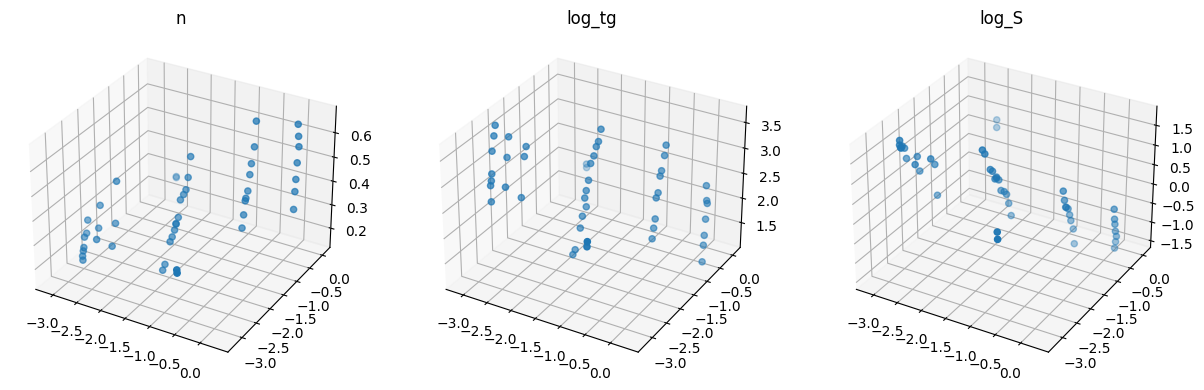

In [7]:
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["n"])
ax.set_title("n")
ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["log_tg"])
ax.set_title("log_tg")
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(dr[:,0],dr[:,1],dfy["log_S"])
ax.set_title("log_S")
plt.show()

In [8]:
X=np.array(dfx)
y=np.array(dfy)

In [9]:
outputs=["n","log_tg","log_S"]

In [10]:
#Training Data has "all" the non 30C temperature points , rest are split randomly
X_train,X_test,y_train,y_test=model_selection.train_test_split(X[np.invert(idx)],y[np.invert(idx)],test_size=0.2,random_state=45)
X_train=np.vstack((X_train,X[idx]))
y_train=np.vstack((y_train,y[idx]))
X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)
X_test=torch.tensor(X_test)
y_test=torch.tensor(y_test)

In [11]:
X_train

tensor([[ 2.8000,  3.0000, 30.0000],
        [ 2.8000,  3.0000, 30.0000],
        [ 2.6000,  3.0000, 30.0000],
        [ 3.4000,  1.0000, 30.0000],
        [ 1.6000,  3.0000, 30.0000],
        [ 2.8000,  5.0000, 30.0000],
        [ 3.2000,  3.0000, 30.0000],
        [ 2.0000,  5.0000, 30.0000],
        [ 1.2000,  7.0000, 30.0000],
        [ 4.0000,  0.0000, 30.0000],
        [ 3.0000,  3.0000, 30.0000],
        [ 1.8000,  5.0000, 30.0000],
        [ 3.2000,  0.0000, 30.0000],
        [ 2.4000,  1.0000, 30.0000],
        [ 2.4000,  7.0000, 30.0000],
        [ 1.6000,  5.0000, 30.0000],
        [ 1.8000,  7.0000, 30.0000],
        [ 1.8000,  3.0000, 30.0000],
        [ 3.0000,  0.4000, 30.0000],
        [ 2.0000,  3.0000, 30.0000],
        [ 1.2000,  5.0000, 30.0000],
        [ 1.6000,  7.0000, 30.0000],
        [ 3.8000,  3.0000, 30.0000],
        [ 3.0000,  0.0000, 30.0000],
        [ 3.4000,  3.0000, 30.0000],
        [ 3.6000,  0.0000, 30.0000],
        [ 1.4000,  7.0000, 30.0000],
 

In [12]:
salt_conc=np.array([0,0.4,1,3,5,7])
temp=30*np.ones((6))

In [13]:
wt=[0.6,0.8,1,5,8]
X_test=X
for j in range(len(wt)):
    x_temp=np.transpose(np.vstack((wt[j]*np.ones((1,6)),salt_conc,temp)))    
    X_test=np.vstack((X_test,x_temp))

In [14]:
X_test

array([[ 2.8,  0. , 30. ],
       [ 3. ,  0. , 30. ],
       [ 3.2,  0. , 30. ],
       [ 3.4,  0. , 30. ],
       [ 3.6,  0. , 30. ],
       [ 3.8,  0. , 30. ],
       [ 4. ,  0. , 30. ],
       [ 3.4,  0.4, 30. ],
       [ 3. ,  0.4, 30. ],
       [ 2.6,  0.4, 30. ],
       [ 3.4,  1. , 30. ],
       [ 2.8,  1. , 30. ],
       [ 2.4,  1. , 30. ],
       [ 4. ,  3. , 30. ],
       [ 3.8,  3. , 30. ],
       [ 3.4,  3. , 30. ],
       [ 3.2,  3. , 30. ],
       [ 3. ,  3. , 30. ],
       [ 2.8,  3. , 30. ],
       [ 2.6,  3. , 30. ],
       [ 2.4,  3. , 30. ],
       [ 2.2,  3. , 30. ],
       [ 2. ,  3. , 30. ],
       [ 1.8,  3. , 30. ],
       [ 1.6,  3. , 30. ],
       [ 1.2,  5. , 30. ],
       [ 1.4,  5. , 30. ],
       [ 1.6,  5. , 30. ],
       [ 1.8,  5. , 30. ],
       [ 2. ,  5. , 30. ],
       [ 2.2,  5. , 30. ],
       [ 2.4,  5. , 30. ],
       [ 2.6,  5. , 30. ],
       [ 2.8,  5. , 30. ],
       [ 1.2,  7. , 30. ],
       [ 1.4,  7. , 30. ],
       [ 1.6,  7. , 30. ],
 

In [15]:
weight_var_3=np.arange(0.8,8,0.05)
sz=len(weight_var_3)
X_test_3=np.transpose(np.vstack((weight_var_3,3*np.ones(sz),30*np.ones(sz))))

In [16]:
X_test_3

array([[ 0.8 ,  3.  , 30.  ],
       [ 0.85,  3.  , 30.  ],
       [ 0.9 ,  3.  , 30.  ],
       [ 0.95,  3.  , 30.  ],
       [ 1.  ,  3.  , 30.  ],
       [ 1.05,  3.  , 30.  ],
       [ 1.1 ,  3.  , 30.  ],
       [ 1.15,  3.  , 30.  ],
       [ 1.2 ,  3.  , 30.  ],
       [ 1.25,  3.  , 30.  ],
       [ 1.3 ,  3.  , 30.  ],
       [ 1.35,  3.  , 30.  ],
       [ 1.4 ,  3.  , 30.  ],
       [ 1.45,  3.  , 30.  ],
       [ 1.5 ,  3.  , 30.  ],
       [ 1.55,  3.  , 30.  ],
       [ 1.6 ,  3.  , 30.  ],
       [ 1.65,  3.  , 30.  ],
       [ 1.7 ,  3.  , 30.  ],
       [ 1.75,  3.  , 30.  ],
       [ 1.8 ,  3.  , 30.  ],
       [ 1.85,  3.  , 30.  ],
       [ 1.9 ,  3.  , 30.  ],
       [ 1.95,  3.  , 30.  ],
       [ 2.  ,  3.  , 30.  ],
       [ 2.05,  3.  , 30.  ],
       [ 2.1 ,  3.  , 30.  ],
       [ 2.15,  3.  , 30.  ],
       [ 2.2 ,  3.  , 30.  ],
       [ 2.25,  3.  , 30.  ],
       [ 2.3 ,  3.  , 30.  ],
       [ 2.35,  3.  , 30.  ],
       [ 2.4 ,  3.  , 30.  ],
       [ 2

In [17]:
sc_X=StandardScaler()
sc_X.fit(X)
X_train_sc=sc_X.transform(X_train)
X_test_sc=sc_X.transform(X_test)
X_test_3_sc=sc_X.transform(X_test_3)

In [18]:
sc_y=StandardScaler()
sc_y.fit(y)
y_train_sc=sc_y.transform(y_train)

In [19]:
sc_y.mean_

array([0.36045261, 2.52201917, 0.32363501])

In [20]:
sc_y.var_

array([0.01803499, 0.37730585, 0.74858488])

Training Set X 


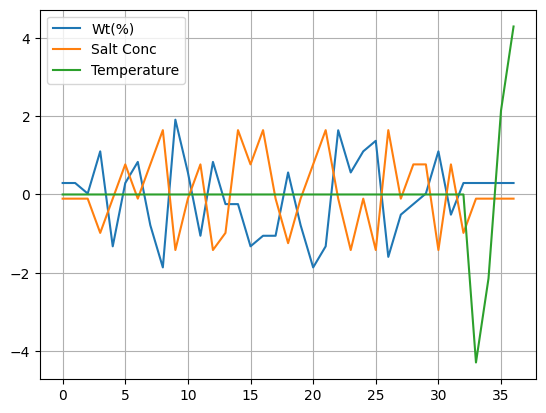

In [21]:
print("Training Set X ")
plt.plot(X_train_sc)
plt.legend(["Wt(%)","Salt Conc","Temperature"])
plt.grid()

Training Set y 


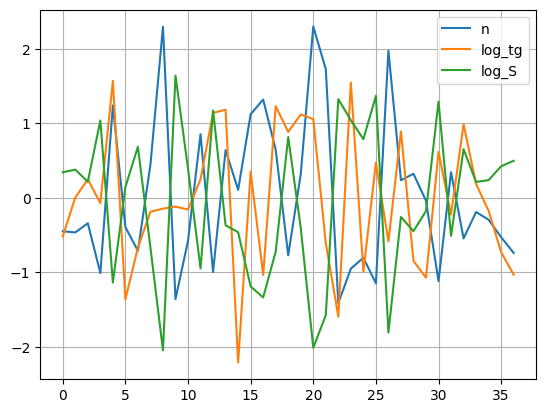

In [22]:
print("Training Set y ")
plt.plot(y_train_sc)
plt.legend(["n","log_tg","log_S"])
plt.grid()

In [23]:
X_train_sc=torch.tensor(X_train_sc)
y_train_sc=torch.tensor(y_train_sc)
X_test_sc=torch.tensor(X_test_sc)
X_test_3_sc=torch.tensor(X_test_3_sc)

## Independent Inference using RBF Kernel

In [24]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()

In [25]:
class GK_GP_Model(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GK_GP_Model, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [26]:
pred_gk_train_means=np.zeros((len(y_train[:,0]),3))
pred_gk_train_lower=np.zeros((len(y_train[:,0]),3))
pred_gk_train_upper=np.zeros((len(y_train[:,0]),3))
er_mean_train_gk=np.zeros((3,1))
er_median_train_gk=np.zeros((3,1))
pred_gk_test_means=np.zeros((len(X_test_sc),3))
pred_gk_test_lower=np.zeros((len(X_test_sc),3))
pred_gk_test_upper=np.zeros((len(X_test_sc),3))
er_mean_test_gk=np.zeros((3,1))
er_median_test_gk=np.zeros((3,1))
nlpd_test_gk=np.zeros((3,1))

In [27]:
for j in range(3):
    print("Training for",outputs[j])
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model_gk = GK_GP_Model(X_train_sc,y_train_sc[:,j], likelihood)
    training_iter=50
    
    model_gk.train()
    likelihood.train()
    
    # Use the adam optimizer
    optimizer_gk = torch.optim.Adam(model_gk.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
    
    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_gk)
    
    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer_gk.zero_grad()
        # Output from model
        output_gk = model_gk(X_train_sc)
        # Calc loss and backprop gradients
        loss_gk = -mll(output_gk, y_train_sc[:,j])
        loss_gk.backward()
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
             i + 1, training_iter, loss_gk.item(),
             model_gk.covar_module.base_kernel.lengthscale.item(),
             model_gk.likelihood.noise.item()
         ))
        optimizer_gk.step()
    lengthscale=model_gk.covar_module.base_kernel.lengthscale.item()
    noise = model_gk.likelihood.noise.item()
    print("Length scale for the trained RBF Kernel for ",outputs[j]," : ",lengthscale)
    print("Noise Parameter of the Gaussian likelihood for",outputs[j]," : ",noise)
    model_gk.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Obtain the predictive mean and covariance matrix
        f_preds_gk = model_gk(X_test_sc)
        f_mean_gk= f_preds_gk.mean
        f_cov_gk = f_preds_gk.covariance_matrix
    
        # Make predictions by feeding model through likelihood
        observed_pred_gk = likelihood(model_gk(X_test_sc))
        lower_gk, upper_gk = observed_pred_gk.confidence_region()
        pred_gk_test_means[:,j]=observed_pred_gk.mean.numpy()
        pred_gk_test_lower[:,j]=lower_gk.numpy()
        pred_gk_test_upper[:,j]=upper_gk.numpy()

Training for n
Iter 1/50 - Loss: 1.141   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 1.105   lengthscale: 0.744   noise: 0.644
Iter 3/50 - Loss: 1.068   lengthscale: 0.798   noise: 0.598
Iter 4/50 - Loss: 1.033   lengthscale: 0.854   noise: 0.554
Iter 5/50 - Loss: 0.999   lengthscale: 0.912   noise: 0.513
Iter 6/50 - Loss: 0.965   lengthscale: 0.973   noise: 0.474
Iter 7/50 - Loss: 0.931   lengthscale: 1.035   noise: 0.437
Iter 8/50 - Loss: 0.898   lengthscale: 1.098   noise: 0.402
Iter 9/50 - Loss: 0.864   lengthscale: 1.163   noise: 0.370
Iter 10/50 - Loss: 0.831   lengthscale: 1.228   noise: 0.340
Iter 11/50 - Loss: 0.798   lengthscale: 1.294   noise: 0.312
Iter 12/50 - Loss: 0.765   lengthscale: 1.360   noise: 0.286
Iter 13/50 - Loss: 0.733   lengthscale: 1.427   noise: 0.261
Iter 14/50 - Loss: 0.702   lengthscale: 1.494   noise: 0.239
Iter 15/50 - Loss: 0.670   lengthscale: 1.560   noise: 0.218
Iter 16/50 - Loss: 0.640   lengthscale: 1.626   noise: 0.199
Iter 17/50 - Loss:

In [28]:
pred_gk_test_means_org_dim=sc_y.inverse_transform(pred_gk_test_means)
pred_gk_test_lower_org_dim=sc_y.inverse_transform(pred_gk_test_lower)
pred_gk_test_upper_org_dim=sc_y.inverse_transform(pred_gk_test_upper)

In [29]:
n_means=pred_gk_test_means_org_dim[:,0]
n_lower=pred_gk_test_lower_org_dim[:,0]
n_upper=pred_gk_test_upper_org_dim[:,0]
S_means=np.power(10,pred_gk_test_means_org_dim[:,2])
S_lower=np.power(10,pred_gk_test_lower_org_dim[:,2])
S_upper=np.power(10,pred_gk_test_upper_org_dim[:,2])

In [30]:
data=np.transpose(np.vstack((n_lower,n_means,n_upper,S_lower,S_means,S_upper)))
col=["Weight(%)","Salt Conc.","Temp","Lower_n","Mean_n","Upper_n","Lower_S","Mean_S","Upper_S"]
comp_data=data[0:len(X)-1,:]
out_data=data[len(X):,:]
data_df=pd.DataFrame(data=np.hstack((X_test[len(X):,:],out_data)),columns=col)

In [31]:
data_df

,Weight(%),Salt Conc.,Temp,Lower_n,Mean_n,Upper_n,Lower_S,Mean_S,Upper_S
0,0.6,0.0,30.0,0.503384,0.652097,0.800809,0.011425,0.050968,0.227381
1,0.6,0.4,30.0,0.519286,0.659413,0.799539,0.011202,0.045605,0.185660
2,0.6,1.0,30.0,0.542375,0.670563,0.798750,0.010776,0.038656,0.138673
3,0.6,3.0,30.0,0.610959,0.708865,0.806771,0.008748,0.022842,0.059642
4,0.6,5.0,30.0,0.664220,0.746892,0.829564,0.006491,0.014465,0.032235
5,0.6,7.0,30.0,0.698660,0.780057,0.861454,0.004662,0.010239,0.022488
6,0.8,0.0,30.0,0.488569,0.622764,0.756959,0.020093,0.076874,0.294112
7,0.8,0.4,30.0,0.503475,0.629231,0.754987,0.019733,0.069079,0.241819
8,0.8,1.0,30.0,0.525015,0.639141,0.753267,0.019000,0.058888,0.182518
9,0.8,3.0,30.0,0.588240,0.673796,0.759353,0.015283,0.035225,0.081190


In [32]:
idx_pt=data[:,1]<0.41
idx_pt_2=np.invert(idx_pt)
coeff1=np.polyfit(data[idx_pt,1],np.log10(data[idx_pt,4]),1)
coeff2=np.polyfit(data[idx_pt_2,1],np.log10(data[idx_pt_2,4]),1)
xp1=np.arange(0.1,0.4,0.01)
yp1=np.polyval(coeff1,xp1)
xp2=np.arange(0.4,0.82,0.01)
yp2=np.polyval(coeff2,xp2)

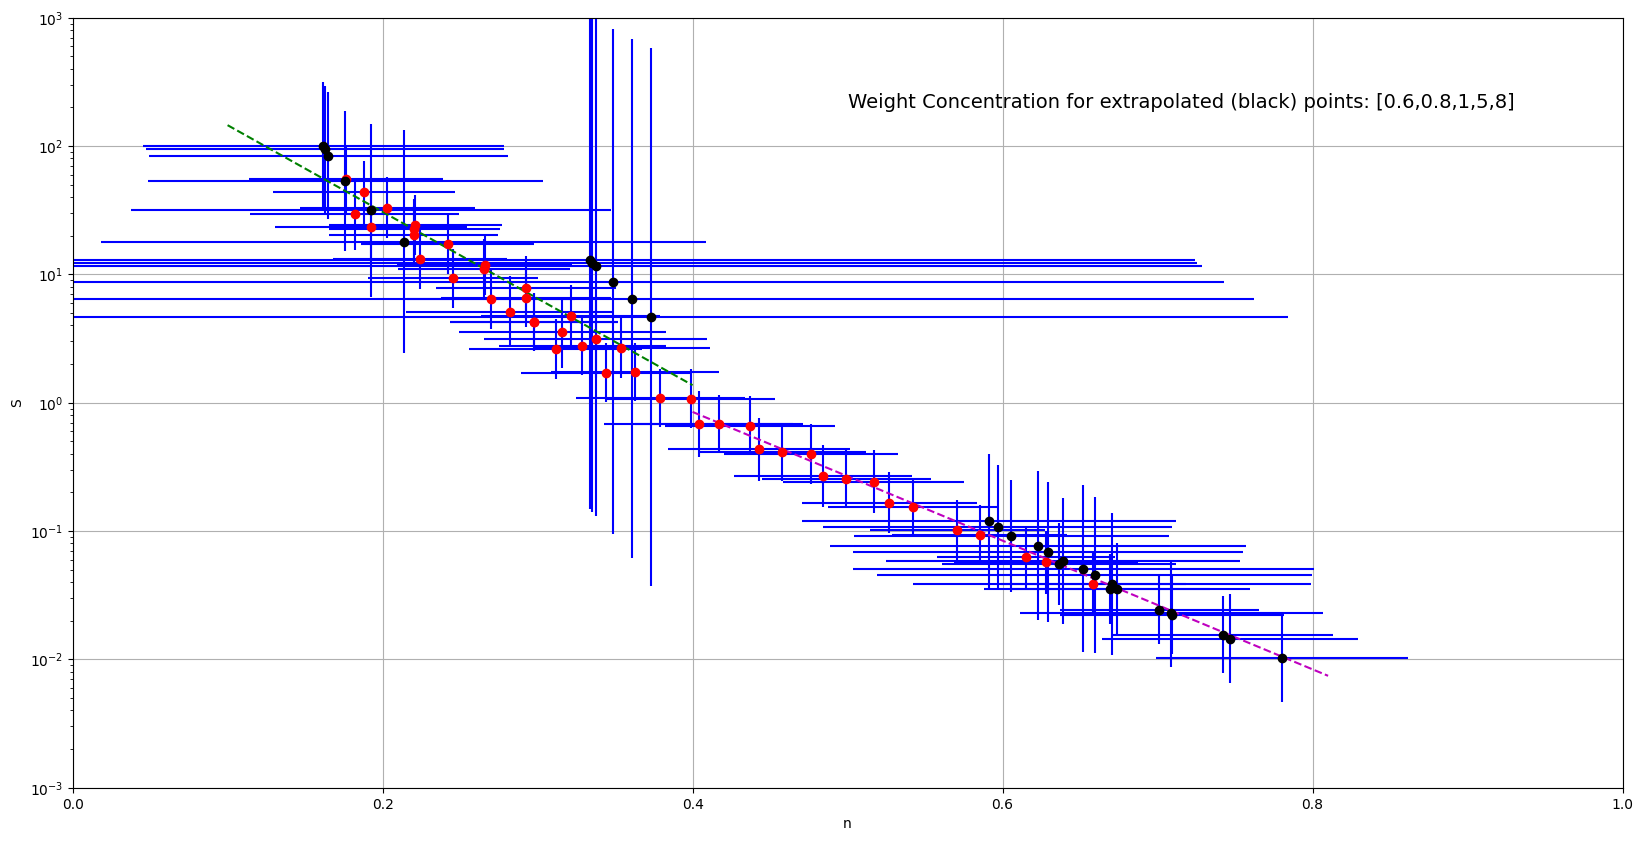

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))  # Create the figure and axis together
ax.errorbar(comp_data[:,1],comp_data[:,4], yerr=[comp_data[:,4] - comp_data[:,3], comp_data[:,5] - comp_data[:,4]], xerr=[comp_data[:,1] - comp_data[:,0], comp_data[:,2] - comp_data[:,1]], fmt='o', c='r',ecolor='b')
ax.errorbar(out_data[:,1],out_data[:,4], yerr=[out_data[:,4] - out_data[:,3], out_data[:,5] - out_data[:,4]], xerr=[out_data[:,1] - out_data[:,0], out_data[:,2] - out_data[:,1]], fmt='o', c='k',ecolor='b')
ax.set_xlabel("n")
ax.set_yscale("log")
ax.set_ylabel("S")
ax.set_xlim(0.0,1.0)
ax.set_ylim(10**(-3),10**(3))
ax.plot(xp1,np.power(10,yp1),'--g')
ax.plot(xp2,np.power(10,yp2),'--m')
plt.text(0.5,200,"Weight Concentration for extrapolated (black) points: [0.6,0.8,1,5,8]",fontsize=14)
plt.grid()
plt.show()

In [34]:
pred_gk_train_means=np.zeros((len(y_train[:,0]),3))
pred_gk_train_lower=np.zeros((len(y_train[:,0]),3))
pred_gk_train_upper=np.zeros((len(y_train[:,0]),3))
er_mean_train_gk=np.zeros((3,1))
er_median_train_gk=np.zeros((3,1))
pred_gk_test_means=np.zeros((len(X_test_3_sc),3))
pred_gk_test_lower=np.zeros((len(X_test_3_sc),3))
pred_gk_test_upper=np.zeros((len(X_test_3_sc),3))
er_mean_test_gk=np.zeros((3,1))
er_median_test_gk=np.zeros((3,1))
nlpd_test_gk=np.zeros((3,1))

In [35]:
for j in range(3):
    print("Training for",outputs[j])
    model_gk = GK_GP_Model(X_train_sc,y_train_sc[:,j], likelihood)
    training_iter=50
    
    model_gk.train()
    likelihood.train()
    
    # Use the adam optimizer
    optimizer_gk = torch.optim.Adam(model_gk.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
    
    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_gk)
    
    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer_gk.zero_grad()
        # Output from model
        output_gk = model_gk(X_train_sc)
        # Calc loss and backprop gradients
        loss_gk = -mll(output_gk, y_train_sc[:,j])
        loss_gk.backward()
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
             i + 1, training_iter, loss_gk.item(),
             model_gk.covar_module.base_kernel.lengthscale.item(),
             model_gk.likelihood.noise.item()
         ))
        optimizer_gk.step()
    lengthscale=model_gk.covar_module.base_kernel.lengthscale.item()
    noise = model_gk.likelihood.noise.item()
    print("Length scale for the trained RBF Kernel for ",outputs[j]," : ",lengthscale)
    print("Noise Parameter of the Gaussian likelihood for",outputs[j]," : ",noise)
    model_gk.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Obtain the predictive mean and covariance matrix
        f_preds_gk = model_gk(X_test_3_sc)
        f_mean_gk= f_preds_gk.mean
        f_cov_gk = f_preds_gk.covariance_matrix
    
        # Make predictions by feeding model through likelihood
        observed_pred_gk = likelihood(model_gk(X_test_3_sc))
        lower_gk, upper_gk = observed_pred_gk.confidence_region()
        pred_gk_test_means[:,j]=observed_pred_gk.mean.numpy()
        pred_gk_test_lower[:,j]=lower_gk.numpy()
        pred_gk_test_upper[:,j]=upper_gk.numpy()

Training for n
Iter 1/50 - Loss: 0.403   lengthscale: 0.693   noise: 0.016
Iter 2/50 - Loss: 0.363   lengthscale: 0.744   noise: 0.014
Iter 3/50 - Loss: 0.330   lengthscale: 0.798   noise: 0.013
Iter 4/50 - Loss: 0.305   lengthscale: 0.851   noise: 0.012
Iter 5/50 - Loss: 0.289   lengthscale: 0.904   noise: 0.011
Iter 6/50 - Loss: 0.281   lengthscale: 0.952   noise: 0.010
Iter 7/50 - Loss: 0.278   lengthscale: 0.992   noise: 0.009
Iter 8/50 - Loss: 0.276   lengthscale: 1.018   noise: 0.008
Iter 9/50 - Loss: 0.274   lengthscale: 1.031   noise: 0.007
Iter 10/50 - Loss: 0.269   lengthscale: 1.033   noise: 0.007
Iter 11/50 - Loss: 0.264   lengthscale: 1.024   noise: 0.006
Iter 12/50 - Loss: 0.260   lengthscale: 1.010   noise: 0.006
Iter 13/50 - Loss: 0.258   lengthscale: 0.994   noise: 0.006
Iter 14/50 - Loss: 0.259   lengthscale: 0.977   noise: 0.005
Iter 15/50 - Loss: 0.261   lengthscale: 0.964   noise: 0.005
Iter 16/50 - Loss: 0.264   lengthscale: 0.956   noise: 0.005
Iter 17/50 - Loss:

In [36]:
pred_gk_test_means_org_dim=sc_y.inverse_transform(pred_gk_test_means)
pred_gk_test_lower_org_dim=sc_y.inverse_transform(pred_gk_test_lower)
pred_gk_test_upper_org_dim=sc_y.inverse_transform(pred_gk_test_upper)

In [37]:
n_means=pred_gk_test_means_org_dim[:,0]
n_lower=pred_gk_test_lower_org_dim[:,0]
n_upper=pred_gk_test_upper_org_dim[:,0]
S_means=np.power(10,pred_gk_test_means_org_dim[:,2])
S_lower=np.power(10,pred_gk_test_lower_org_dim[:,2])
S_upper=np.power(10,pred_gk_test_upper_org_dim[:,2])

In [38]:
data_3_weight_var=np.transpose(np.vstack((n_lower,n_means,n_upper,S_lower,S_means,S_upper)))

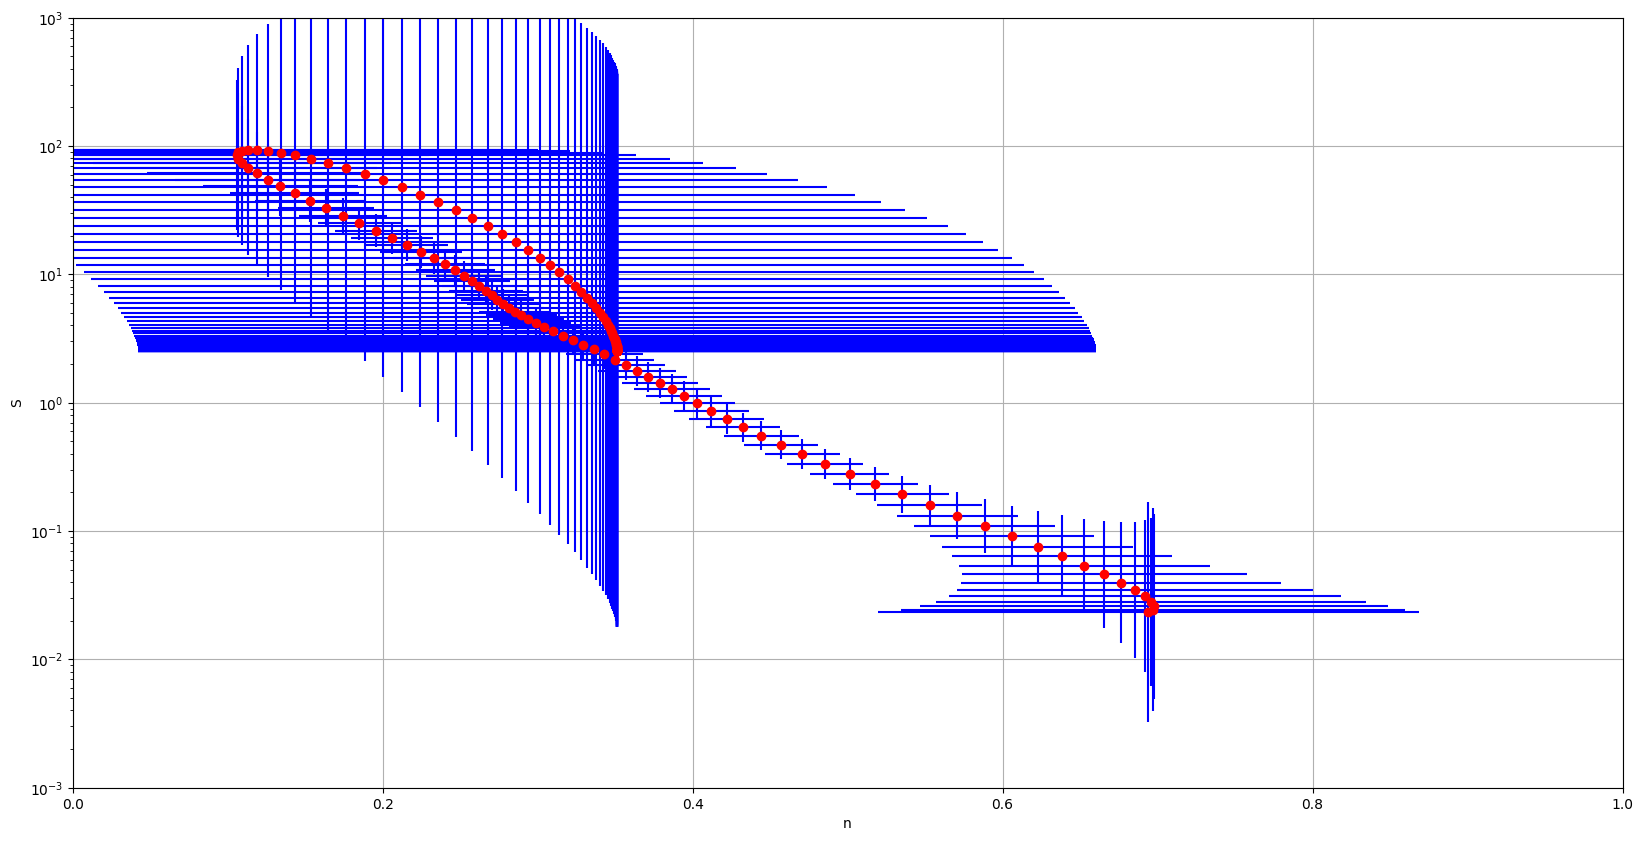

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))  # Create the figure and axis together
ax.errorbar(data_3_weight_var[:,1],data_3_weight_var[:,4], yerr=[data_3_weight_var[:,4] - data_3_weight_var[:,3], data_3_weight_var[:,5] - data_3_weight_var[:,4]], xerr=[data_3_weight_var[:,1] - data_3_weight_var[:,0], data_3_weight_var[:,2] - data_3_weight_var[:,1]], fmt='o', c='r',ecolor='b')
ax.set_xlabel("n")
ax.set_yscale("log")
ax.set_ylabel("S")
ax.set_xlim(0.0,1.0)
ax.set_ylim(10**(-3),10**(3))
plt.grid()
plt.show()

## MOGP Joint Inference using RBF

In [40]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=3
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.RBFKernel(), num_tasks=3, rank=1
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

likelihood_mogp = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=3)

In [41]:
X_train32_sc=X_train_sc.to(torch.float32)
y_train32_sc=y_train_sc.to(torch.float32)
X_test32_sc=X_test_sc.to(torch.float32)
X_test32_3_sc=X_test_3_sc.to(torch.float32)

In [42]:
model_mogp = MultitaskGPModel(X_train32_sc,y_train32_sc,likelihood_mogp)

In [43]:
training_iterations =50


# Find optimal model hyperparameters
model_mogp.train()
likelihood_mogp.train()

# Use the adam optimizer
optimizer_mogp = torch.optim.Adam(model_mogp.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll_mogp = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_mogp, model_mogp)

for i in range(training_iterations):
    optimizer_mogp.zero_grad()
    output_mogp = model_mogp(X_train32_sc)
    loss_mogp = -mll_mogp(output_mogp,y_train32_sc)
    loss_mogp.backward()
    optimizer_mogp.step()

In [44]:
mean_params = model_mogp.mean_module.state_dict()
covar_params = model_mogp.covar_module.task_covar_module.covar_matrix.numpy()

In [45]:
mean_params

OrderedDict([('base_means.0.raw_constant', tensor(0.6260)),
             ('base_means.1.raw_constant', tensor(-0.4562)),
             ('base_means.2.raw_constant', tensor(-0.5107))])

In [46]:
covar_params

array([[ 3.0618834,  0.8621702, -2.7564232],
       [ 0.8621702,  3.6265965, -0.7864476],
       [-2.7564232, -0.7864476,  2.5486958]], dtype=float32)

In [47]:
# Set into eval mode
model_mogp.eval()
likelihood_mogp.eval()


# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_mogp = likelihood_mogp(model_mogp(X_test32_sc))
    mean_mogp = predictions_mogp.mean
    lower_mogp, upper_mogp = predictions_mogp.confidence_region()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/linear_operator/utils/interpolation.py:71: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_f7fb22vcd9/croot/pytorch-select_1700447874772/work/torch/csrc/utils/tensor_new.cpp:607.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)


In [48]:
mean_mogp_org_dim=sc_y.inverse_transform(mean_mogp)
lower_mogp_org_dim=sc_y.inverse_transform(lower_mogp)
upper_mogp_org_dim=sc_y.inverse_transform(upper_mogp)

In [49]:
n_means=mean_mogp_org_dim[:,0]
n_lower=lower_mogp_org_dim[:,0]
n_upper=upper_mogp_org_dim[:,0]
S_means=np.power(10,mean_mogp_org_dim[:,2])
S_lower=np.power(10,lower_mogp_org_dim[:,2])
S_upper=np.power(10,upper_mogp_org_dim[:,2])

In [50]:
data_mogp=np.transpose(np.vstack((n_lower,n_means,n_upper,S_lower,S_means,S_upper)))
col=["Weight(%)","Salt Conc.","Temp","Lower_n","Mean_n","Upper_n","Lower_S","Mean_S","Upper_S"]
comp_data_mogp=data[0:len(X)-1,:]
out_data_mogp=data[len(X):,:]
data_mogp_df=pd.DataFrame(data=np.hstack((X_test[len(X):,:],out_data_mogp)),columns=col)

In [51]:
data_mogp_df

,Weight(%),Salt Conc.,Temp,Lower_n,Mean_n,Upper_n,Lower_S,Mean_S,Upper_S
0,0.6,0.0,30.0,0.503384,0.652097,0.800809,0.001977,0.151390,11.594675
1,0.6,0.4,30.0,0.519286,0.659413,0.799539,0.001819,0.115551,7.340133
2,0.6,1.0,30.0,0.542375,0.670563,0.798750,0.001707,0.078732,3.631839
3,0.6,3.0,30.0,0.610959,0.708865,0.806771,0.001759,0.025200,0.361033
4,0.6,5.0,30.0,0.664220,0.746892,0.829564,0.002266,0.012740,0.071619
5,0.6,7.0,30.0,0.698660,0.780057,0.861454,0.005064,0.028878,0.164684
6,0.8,0.0,30.0,0.488569,0.622764,0.756959,0.001413,0.080892,4.632433
7,0.8,0.4,30.0,0.503475,0.629231,0.754987,0.001435,0.063788,2.835811
8,0.8,1.0,30.0,0.525015,0.639141,0.753267,0.001641,0.047641,1.382944
9,0.8,3.0,30.0,0.588240,0.673796,0.759353,0.003222,0.023826,0.176186


In [52]:
idx_pt_mogp=data_mogp[:,1]<0.41
idx_pt_mogp_2=np.invert(idx_pt_mogp)
coeff_mogp=np.polyfit(data_mogp[idx_pt_mogp,1],np.log10(data_mogp[idx_pt_mogp,4]),1)
coeff_mogp_2=np.polyfit(data_mogp[idx_pt_mogp_2,1],np.log10(data_mogp[idx_pt_mogp_2,4]),1)
xp1_mogp=np.arange(0.1,0.4,0.01)
yp1_mogp=np.polyval(coeff_mogp,xp1_mogp)
xp2_mogp=np.arange(0.4,0.82,0.01)
yp2_mogp=np.polyval(coeff_mogp_2,xp2_mogp)

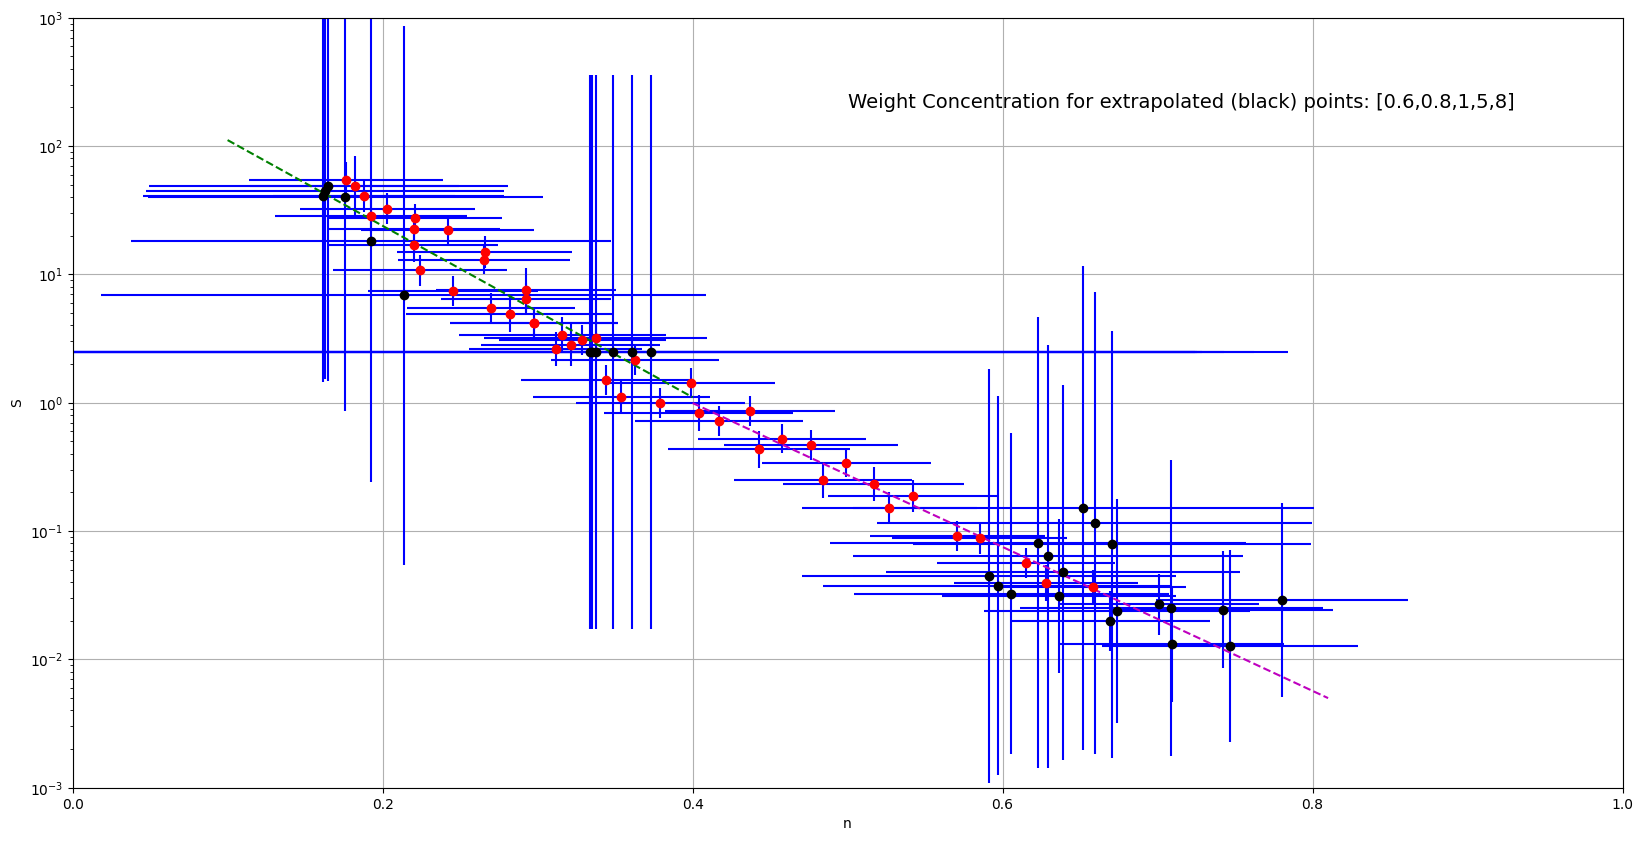

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))  # Create the figure and axis together
ax.errorbar(comp_data_mogp[:,1],comp_data_mogp[:,4], yerr=[comp_data_mogp[:,4] - comp_data_mogp[:,3], comp_data_mogp[:,5] - comp_data_mogp[:,4]], xerr=[comp_data_mogp[:,1] - comp_data_mogp[:,0], comp_data_mogp[:,2] - comp_data_mogp[:,1]], fmt='o', c='r',ecolor='b')
ax.errorbar(out_data_mogp[:,1],out_data_mogp[:,4], yerr=[out_data_mogp[:,4] - out_data_mogp[:,3], out_data_mogp[:,5] - out_data_mogp[:,4]], xerr=[out_data_mogp[:,1] - out_data_mogp[:,0], out_data_mogp[:,2] - out_data_mogp[:,1]], fmt='o', c='k',ecolor='b')
ax.set_xlabel("n")
ax.set_yscale("log")
ax.set_ylabel("S")
ax.set_xlim(0.0,1.0)
ax.set_ylim(10**(-3),10**(3))
ax.plot(xp1_mogp,np.power(10,yp1_mogp),'--g')
ax.plot(xp2_mogp,np.power(10,yp2_mogp),'--m')
plt.text(0.5,200,"Weight Concentration for extrapolated (black) points: [0.6,0.8,1,5,8]",fontsize=14)
plt.grid()
plt.show()

In [54]:
# Set into eval mode
model_mogp.eval()
likelihood_mogp.eval()


# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_mogp = likelihood_mogp(model_mogp(X_test32_3_sc))
    mean_mogp = predictions_mogp.mean
    lower_mogp, upper_mogp = predictions_mogp.confidence_region()

In [55]:
mean_mogp_org_dim=sc_y.inverse_transform(mean_mogp)
lower_mogp_org_dim=sc_y.inverse_transform(lower_mogp)
upper_mogp_org_dim=sc_y.inverse_transform(upper_mogp)

In [56]:
n_means=mean_mogp_org_dim[:,0]
n_lower=lower_mogp_org_dim[:,0]
n_upper=upper_mogp_org_dim[:,0]
S_means=np.power(10,mean_mogp_org_dim[:,2])
S_lower=np.power(10,lower_mogp_org_dim[:,2])
S_upper=np.power(10,upper_mogp_org_dim[:,2])

In [57]:
data_3_weight_var_mogp=np.transpose(np.vstack((n_lower,n_means,n_upper,S_lower,S_means,S_upper)))

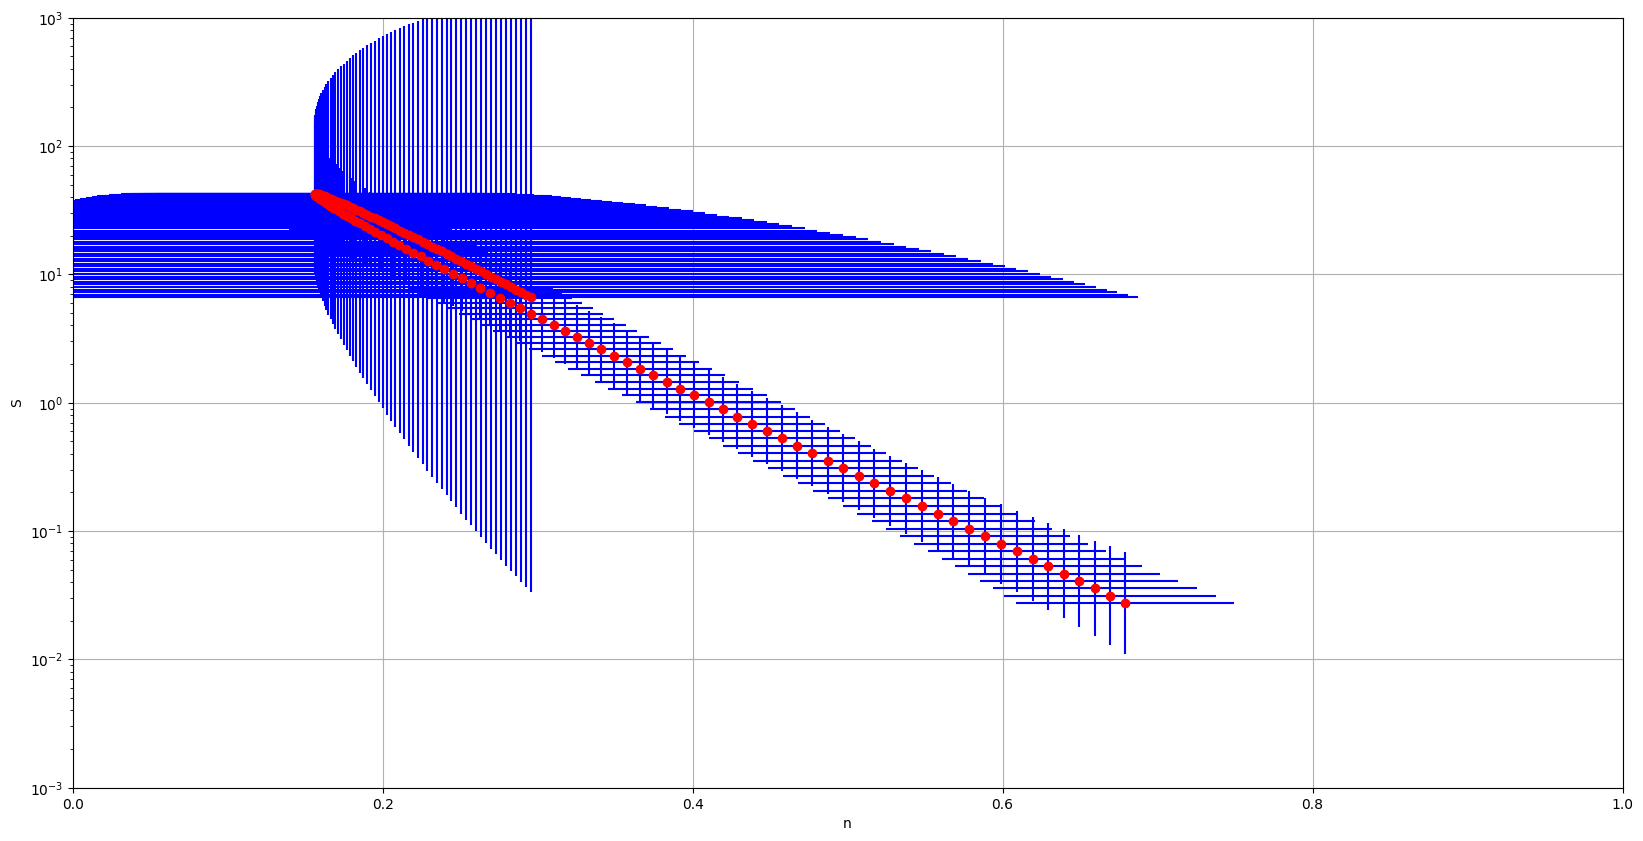

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))  # Create the figure and axis together
ax.errorbar(data_3_weight_var_mogp[:,1],data_3_weight_var_mogp[:,4], yerr=[data_3_weight_var_mogp[:,4] - data_3_weight_var_mogp[:,3], data_3_weight_var_mogp[:,5] - data_3_weight_var_mogp[:,4]], xerr=[data_3_weight_var_mogp[:,1] - data_3_weight_var_mogp[:,0], data_3_weight_var_mogp[:,2] - data_3_weight_var_mogp[:,1]], fmt='o', c='r',ecolor='b')
ax.set_xlabel("n")
ax.set_yscale("log")
ax.set_ylabel("S")
ax.set_xlim(0.0,1.0)
ax.set_ylim(10**(-3),10**(3))
plt.grid()
plt.show()